<a href="https://colab.research.google.com/github/neildcp/Teste-Final/blob/main/Projeto_Final_Python_para_Ci%C3%AAncia_de_Dados180225_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

#Você será avaliado nos painéis que exibem os dados especificados e as capturas de
#tela que você tirou durante as perguntas finais do laboratório do projeto.
#Existem 12 pontos possíveis para esta tarefa. Aqui está o detalhamento:

#Pergunta 1 - Extraindo dados de ações da Tesla usando yfinance - 2 pontos
#Pergunta 2 - Extraindo dados de receita da Tesla usando webscraping - 1 pontos
#Pergunta 3 - Extraindo dados de ações da GameStop usando yfinance - 2 pontos
#Pergunta 4 - Extraindo dados de receita da GameStop usando webscraping - 1 pontos
#Pergunta 5 - Painel de Ações e Receitas da Tesla - 2 Pontos
#Pergunta 6 - Painel de Ações e Receitas da GameStop - 2 Pontos
#Pergunta 7 - Compartilhando seu caderno de tarefas - 2 pontos


In [2]:
#Pergunta 1 - Extraindo dados de ações da Tesla usando yfinance - 2 pontos


asset = yf.Ticker("TSLA")
asset_data = asset.history(period="max")
asset_data.reset_index(inplace=True)
asset_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
#Pergunta 2 - Extraindo dados de receita da Tesla usando webscraping - 1 pontos

import yfinance as yf
import pandas as pd

def get_tesla_revenue():
    # Baixando os dados da Tesla
    tsla = yf.Ticker("TSLA")

    # Extraindo o histórico de receitas
    income_stmt = tsla.financials

    # Selecionando apenas a linha de receita (Total Revenue)
    revenue = income_stmt.loc["Total Revenue"]

    # Convertendo para DataFrame e formatando
    revenue_df = pd.DataFrame(revenue).reset_index()
    revenue_df.columns = ["Date", "Revenue"]

    return revenue_df

# Obtendo os dados e exibindo
tesla_revenue = get_tesla_revenue()
#title= yf.Ticker(tesla_revenue+".SA")
#print(tesla_revenue)
print("TESLA REVENUE")
tesla_revenue


TESLA REVENUE


,Date,Revenue
0,2024-12-31,97690000000.0
1,2023-12-31,96773000000.0
2,2022-12-31,81462000000.0
3,2021-12-31,53823000000.0
4,2020-12-31,NaN


In [ ]:
#Pergunta 2 - Extraindo dados de receita da Tesla usando webscraping - 1 pontos
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL da página de receitas da Tesla no Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Fazendo a requisição HTTP para obter o conteúdo da página
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Encontrando a tabela de receitas
    tables = soup.find_all("table", class_="historical_data_table")
    if tables:
        revenue_table = tables[0]  # Pegamos a primeira tabela
        rows = revenue_table.find_all("tr")

        # Extraindo os dados
        data = []
        for row in rows[1:]:  # Pulamos o cabeçalho
            cols = row.find_all("td")
            if len(cols) == 2:  # Garantindo que há duas colunas (Data e Receita)
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                data.append([date, revenue])

        # Criando um DataFrame com os dados
        df = pd.DataFrame(data, columns=["Data", "Receita"])

        # Salvando em CSV
        df.to_csv("tesla_revenue.csv", index=False)
        print("Arquivo 'tesla_revenue.csv' salvo com sucesso!\n")

        print("Segue abaixo receita da TESLA.SA \n",df)
    else:
        print("Tabela de receitas não encontrada!")
else:
    print(f"Erro ao acessar a página. Código de status: {response.status_code}")


Arquivo 'tesla_revenue.csv' salvo com sucesso!

Segue abaixo receita da TESLA.SA 
     Data  Receita
0   2024  $97,690
1   2023  $96,773
2   2022  $81,462
3   2021  $53,823
4   2020  $31,536
5   2019  $24,578
6   2018  $21,461
7   2017  $11,759
8   2016   $7,000
9   2015   $4,046
10  2014   $3,198
11  2013   $2,013
12  2012     $413
13  2011     $204
14  2010     $117
15  2009     $112


In [ ]:
#Pergunta 3 - Extraindo dados de ações da GameStop usando yfinance - 2 pontos

import yfinance as yf
import pandas as pd

# Definir o ticker da GameStop
ticker = "GME"

# Baixar os dados históricos
gme = yf.Ticker(ticker)
df = gme.history(period="1y")  # Último ano de dados

# Salvar em CSV
df.to_csv("gamestop_stock_data.csv")

print("Arquivo 'gamestop_stock_data.csv' salvo com sucesso!\n")
print("Segue abaixo Dados do último ano da GAMESTOP.SA \n",df.head)


Arquivo 'gamestop_stock_data.csv' salvo com sucesso!

Segue abaixo Dados do último ano da GAMESTOP 
 <bound method NDFrame.head of                                 Open       High        Low      Close  \
Date                                                                    
2024-02-14 00:00:00-05:00  14.330000  14.430000  14.050000  14.410000   
2024-02-15 00:00:00-05:00  14.540000  14.750000  14.230000  14.510000   
2024-02-16 00:00:00-05:00  14.460000  14.530000  14.100000  14.120000   
2024-02-20 00:00:00-05:00  13.960000  14.050000  13.160000  13.490000   
2024-02-21 00:00:00-05:00  13.460000  13.670000  13.230000  13.410000   
...                              ...        ...        ...        ...   
2025-02-10 00:00:00-05:00  25.500000  27.270000  25.299999  27.120001   
2025-02-11 00:00:00-05:00  26.850000  27.760000  26.469999  26.559999   
2025-02-12 00:00:00-05:00  26.120001  26.400000  25.600000  25.990000   
2025-02-13 00:00:00-05:00  25.750000  26.400000  25.750000  26.340

In [ ]:
#Pergunta 4 - Extraindo dados de receita da GameStop usando webscraping - 1 pontos
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL da página de receitas da GameStop no Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Faz a requisição HTTP
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Verifica se a requisição foi bem-sucedida
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Encontra a tabela de receita
    table = soup.find("table", {"class": "historical_data_table"})

    if table:
        # Extrai os dados da tabela
        rows = table.find_all("tr")
        data = []

        for row in rows[1:]:  # Ignorar cabeçalho
            cols = row.find_all("td")
            cols = [col.text.strip() for col in cols]
            if cols:
                data.append(cols)

        # Criar DataFrame
        df = pd.DataFrame(data, columns=["Ano", "Receita (Bilhões USD)"])
        print("Receita Gamestop por ano.\n")
        print(df.head())

    else:
        print("Tabela de receitas não encontrada.")

else:
    print("Falha ao acessar a página. Código de status:", response.status_code)


Receita Gamestop por ano.

    Ano Receita (Bilhões USD)
0  2024                $5,273
1  2023                $5,927
2  2022                $6,011
3  2021                $5,090
4  2020                $6,466


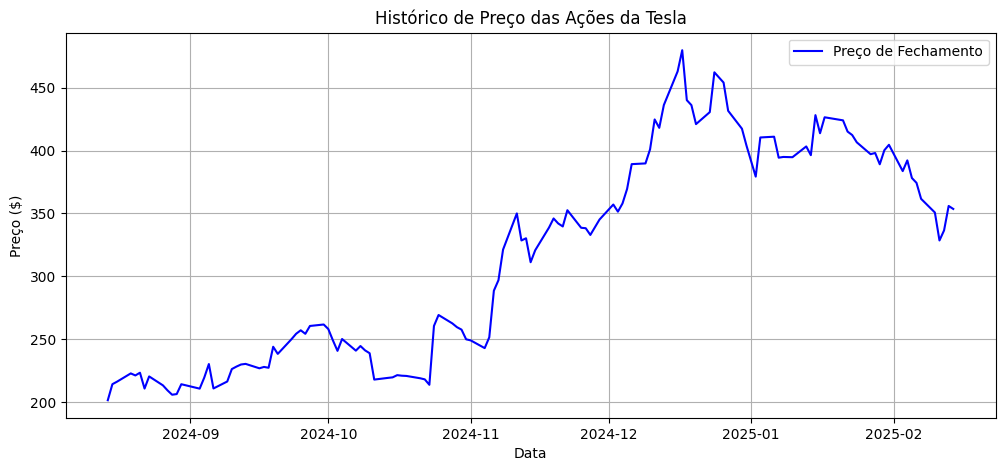

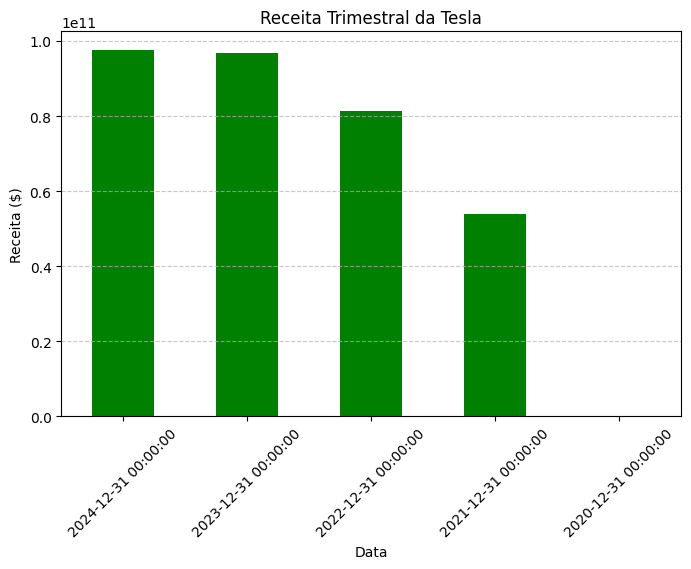

In [ ]:
#Pergunta 5 - Painel de Ações e Receitas da Tesla - 2 Pontos

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Baixar dados da Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Obter histórico de preços das ações
historico = tesla.history(period="6mo")  # Últimos 6 meses

# Obter dados financeiros (receita)
receitas = tesla.financials.loc["Total Revenue"]

# Criar gráfico do preço das ações
plt.figure(figsize=(12, 5))
plt.plot(historico.index, historico["Close"], label="Preço de Fechamento", color="blue")
plt.xlabel("Data")
plt.ylabel("Preço ($)")
plt.title("Histórico de Preço das Ações da Tesla")
plt.legend()
plt.grid(True)
plt.show()

# Criar gráfico da Receita
plt.figure(figsize=(8, 5))
receitas.plot(kind="bar", color="green")
plt.xlabel("Data")
plt.ylabel("Receita ($)")
plt.title("Receita Trimestral da Tesla")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [ ]:
#Pergunta 6 - Painel de Ações e Receitas da GameStop - 2 Pontos

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Baixar os dados financeiros da GameStop
ticker = "GME"
gme = yf.Ticker(ticker)

# Obter dados históricos de ações
df_stock = gme.history(period="1y")  # Último ano

# Obter os dados de receita
df_income = gme.financials.loc["Total Revenue"]

# Criar o gráfico de preço das ações
fig_stock = go.Figure()
fig_stock.add_trace(go.Scatter(x=df_stock.index, y=df_stock["Close"], mode="lines", name="Preço de Fechamento"))
fig_stock.update_layout(title="Preço das Ações da GameStop (GME)", xaxis_title="Data", yaxis_title="Preço (USD)")

# Criar o gráfico de receita
fig_income = go.Figure()
fig_income.add_trace(go.Bar(x=df_income.index, y=df_income.values, name="Receita"))
fig_income.update_layout(title="Receita da GameStop", xaxis_title="Trimestres", yaxis_title="Receita (USD)")

# Exibir os gráficos
fig_stock.show()
fig_income.show()


